# 1. Preparation before running plans... 

## 1.1. Import Numpy and Matplotlib

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

## 1.2. Create a RunEngine:

In [2]:
from bluesky import RunEngine
RE = RunEngine({})

## 1.3. Prepare Live Visualization¶

In [3]:
from bluesky.callbacks.best_effort import BestEffortCallback
bec = BestEffortCallback()

# Send all metadata/data captured to the BestEffortCallback.
RE.subscribe(bec)

# Make plots update live while scans run.
from bluesky.utils import install_kicker
install_kicker()

## 1.4. Prepare Data Storage

In [4]:
from databroker import Broker
db = Broker.named('temp')

# Insert all metadata/data captured into db.
RE.subscribe(db.insert)

1

##### This example makes a temporary database. Do not use it for important data. The data will become difficult to access once Python exits or the variable db is deleted. Running Broker.named('temp') a second time creates a fresh, separate temporary database.

## 1.5. Add a Progress Bar

In [5]:
from bluesky.utils import ProgressBarManager
RE.waiting_hook = ProgressBarManager()

# 2. Simple Customization

In [6]:
from ophyd.sim import det1, det2, det4, motor1, motor2
from bluesky.plans import count, scan
from bluesky.plan_stubs import mv

In [7]:
def coarse_and_ine(detectors, motor, start, stop):
    yield from scan(detectors, motor, start, stop, 10)
    yield from scan(detectors, motor, start, stop, 100)

In [8]:
from bluesky.plan_stubs import mv

def move_then_count(detectors, motors, positions):
    for m in motors:
        for p in positions:
            yield from mv(m, p)
            yield from count(detectors)

In [9]:
def multi_step_scan(detectors, motors, start, stop, steps, step_min=1, step_max=10, note=None, md=None):
    _md = {"detectors" : [det.name for det in detectors], 
           "motors" : [mot.name for mot in motors],
           "start" : start,
           "stop" : stop,
           "steps" : np.arange(step_min, step_max, steps),
           "note" : note if note else "None"}
    _md.update(md or {})
    for m in motors:
        for i in np.arange(step_min, step_max, steps):
            yield from scan(detectors, m, start, stop, i)

In [ ]:
def multi_step_scan1(detectors, motors, start, stop, steps, step_min=1, step_max=10, note=None, md=None):
    for m in motors:
        for i in np.arange(step_min, step_max, steps):
            yield from scan(detectors, m, start, stop, i)



Transient Scan ID: 1     Time: 2022-02-11 13:11:06
Persistent Unique Scan ID: 'd70374d2-f95a-4f71-8bdd-8f10b5eb901c'
New stream: 'primary'


<IPython.core.display.Javascript object>


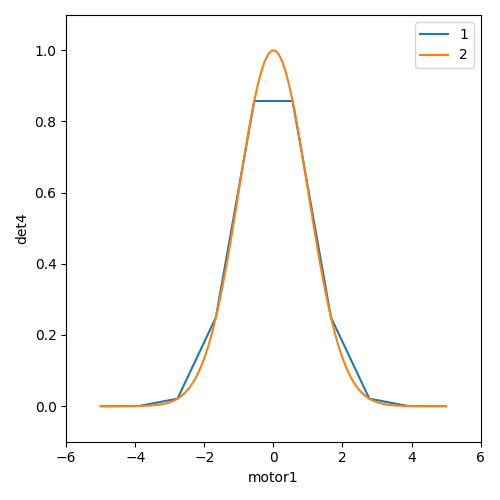

+-----------+------------+------------+------------+
|   seq_num |       time |     motor1 |       det4 |
+-----------+------------+------------+------------+
|         1 | 13:11:07.0 |     -5.000 |      0.000 |
|         2 | 13:11:07.0 |     -3.889 |      0.001 |
|         3 | 13:11:07.0 |     -2.778 |      0.021 |
|         4 | 13:11:07.0 |     -1.667 |      0.249 |
|         5 | 13:11:07.1 |     -0.556 |      0.857 |
|         6 | 13:11:07.1 |      0.556 |      0.857 |
|         7 | 13:11:07.1 |      1.667 |      0.249 |
|         8 | 13:11:07.1 |      2.778 |      0.021 |
|         9 | 13:11:07.1 |      3.889 |      0.001 |
|        10 | 13:11:07.1 |      5.000 |      0.000 |
+-----------+------------+------------+------------+
generator scan ['d70374d2'] (scan num: 1)





Transient Scan ID: 2     Time: 2022-02-11 13:11:07
Persistent Unique Scan ID: '11e21ffc-c6e9-4de7-b7cf-b1f517f6b785'
New stream: 'primary'
+-----------+------------+------------+------------+
|   seq_num |      

('d70374d2-f95a-4f71-8bdd-8f10b5eb901c',
 '11e21ffc-c6e9-4de7-b7cf-b1f517f6b785')

In [10]:
dets = [det4]
RE(coarse_and_ine(dets, motor1, -5, 5))

In [13]:
dets = [det1, det2]
mots = [motor1, motor2]
pos = np.arange(0,10,5)

In [14]:
RE(move_then_count(dets, mots, pos))



Transient Scan ID: 13     Time: 2022-02-11 13:11:26
Persistent Unique Scan ID: '525eaeb5-9295-4178-a065-db3313cf165c'
New stream: 'primary'
+-----------+------------+------------+------------+
|   seq_num |       time |       det2 |       det1 |
+-----------+------------+------------+------------+
|         1 | 13:11:26.1 |      0.004 |      5.000 |
+-----------+------------+------------+------------+
generator count ['525eaeb5'] (scan num: 13)





Transient Scan ID: 14     Time: 2022-02-11 13:11:26
Persistent Unique Scan ID: '7252357f-9572-4223-aa3e-2b7054122af4'
New stream: 'primary'
+-----------+------------+------------+------------+
|   seq_num |       time |       det2 |       det1 |
+-----------+------------+------------+------------+
|         1 | 13:11:26.2 |      0.004 |      0.000 |
+-----------+------------+------------+------------+
generator count ['7252357f'] (scan num: 14)





Transient Scan ID: 15     Time: 2022-02-11 13:11:26
Persistent Unique Scan ID: '848b6ced-9

('525eaeb5-9295-4178-a065-db3313cf165c',
 '7252357f-9572-4223-aa3e-2b7054122af4',
 '848b6ced-941d-49e0-b7ef-ff22f43e3dfa',
 '8175b136-141d-414a-a607-e657deeee24d')



Transient Scan ID: 17     Time: 2022-02-11 13:11:35
Persistent Unique Scan ID: 'fb72a6d5-9bc6-46db-b1ed-06beaf0a484e'
New stream: 'primary'
+-----------+------------+------------+------------+------------+
|   seq_num |       time |     motor1 |       det2 |       det1 |
+-----------+------------+------------+------------+------------+
|         1 | 13:11:35.7 |    -10.000 |      0.271 |      0.000 |
+-----------+------------+------------+------------+------------+
generator scan ['fb72a6d5'] (scan num: 17)





Transient Scan ID: 18     Time: 2022-02-11 13:11:35
Persistent Unique Scan ID: '836178ea-908e-48ca-b5fb-c85eaf204c99'
New stream: 'primary'


<IPython.core.display.Javascript object>


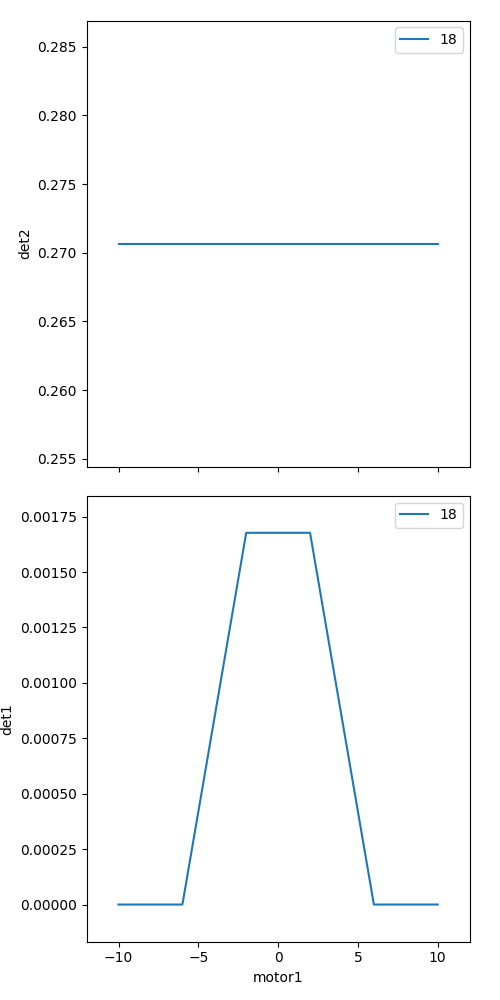

+-----------+------------+------------+------------+------------+
|   seq_num |       time |     motor1 |       det2 |       det1 |
+-----------+------------+------------+------------+------------+
|         1 | 13:11:36.0 |    -10.000 |      0.271 |      0.000 |
|         2 | 13:11:36.0 |     -6.000 |      0.271 |      0.000 |
|         3 | 13:11:36.0 |     -2.000 |      0.271 |      0.002 |
|         4 | 13:11:36.0 |      2.000 |      0.271 |      0.002 |
|         5 | 13:11:36.0 |      6.000 |      0.271 |      0.000 |
|         6 | 13:11:36.0 |     10.000 |      0.271 |      0.000 |
+-----------+------------+------------+------------+------------+
generator scan ['836178ea'] (scan num: 18)





Transient Scan ID: 19     Time: 2022-02-11 13:11:36
Persistent Unique Scan ID: '002544c2-4905-410e-931c-d6bcb2e310ea'
New stream: 'primary'
+-----------+------------+------------+------------+------------+
|   seq_num |       time |     motor2 |       det2 |       det1 |
+-----------+-------

<IPython.core.display.Javascript object>


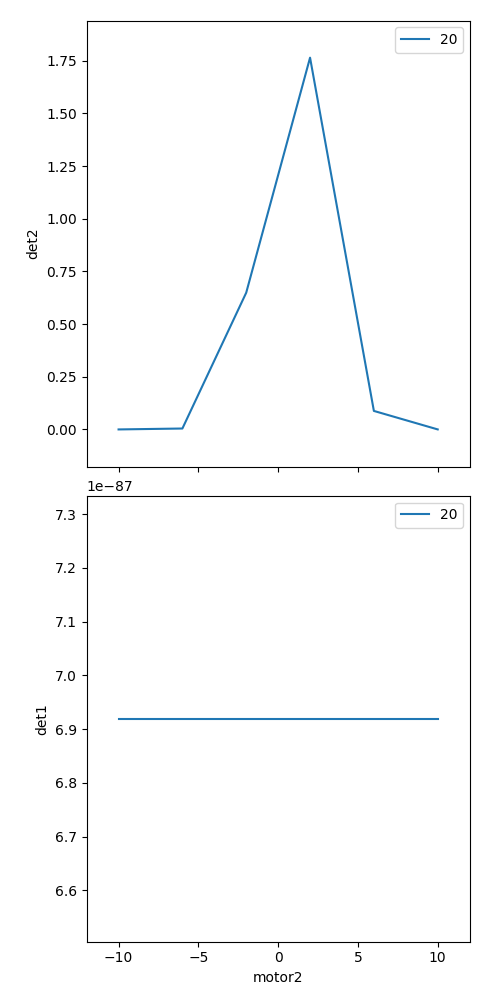

+-----------+------------+------------+------------+------------+
|   seq_num |       time |     motor2 |       det2 |       det1 |
+-----------+------------+------------+------------+------------+
|         1 | 13:11:36.5 |    -10.000 |      0.000 |      0.000 |
|         2 | 13:11:36.5 |     -6.000 |      0.004 |      0.000 |
|         3 | 13:11:36.5 |     -2.000 |      0.649 |      0.000 |
|         4 | 13:11:36.5 |      2.000 |      1.765 |      0.000 |
|         5 | 13:11:36.5 |      6.000 |      0.088 |      0.000 |
|         6 | 13:11:36.5 |     10.000 |      0.000 |      0.000 |
+-----------+------------+------------+------------+------------+
generator scan ['6e5a3815'] (scan num: 20)





('fb72a6d5-9bc6-46db-b1ed-06beaf0a484e',
 '836178ea-908e-48ca-b5fb-c85eaf204c99',
 '002544c2-4905-410e-931c-d6bcb2e310ea',
 '6e5a3815-8951-45af-85c3-98ccf2a1076e')

In [15]:
RE(multi_step_scan(dets, mots, -10, 10, 5, note='testtesttest'))

In [16]:
header = db[-1]
header.table()

,time,motor2,motor2_setpoint,det2,det1
seq_num,,,,,
1,2022-02-11 18:11:36.512285948,-10.0,-10.0,5.399157e-07,6.919483e-87
2,2022-02-11 18:11:36.522137164,-6.0,-6.0,4.374982e-03,6.919483e-87
3,2022-02-11 18:11:36.529862881,-2.0,-2.0,6.493049e-01,6.919483e-87
4,2022-02-11 18:11:36.537621021,2.0,2.0,1.764994e+00,6.919483e-87
5,2022-02-11 18:11:36.544966936,6.0,6.0,8.787387e-02,6.919483e-87
6,2022-02-11 18:11:36.553850174,10.0,10.0,8.013059e-05,6.919483e-87


In [17]:
list(header.documents())

[('start',
  {'uid': '6e5a3815-8951-45af-85c3-98ccf2a1076e',
   'time': 1644603096.35197,
   'versions': {'ophyd': '1.6.3', 'bluesky': '1.8.2'},
   'scan_id': 20,
   'plan_type': 'generator',
   'plan_name': 'scan',
   'detectors': ['det1', 'det2'],
   'motors': ['motor2'],
   'num_points': 6,
   'num_intervals': 5,
   'plan_args': {'detectors': ["SynGauss(prefix='', name='det1', read_attrs=['val'], configuration_attrs=['Imax', 'center', 'sigma', 'noise', 'noise_multiplier'])",
     "SynGauss(prefix='', name='det2', read_attrs=['val'], configuration_attrs=['Imax', 'center', 'sigma', 'noise', 'noise_multiplier'])"],
    'num': 6,
    'args': ["SynAxis(prefix='', name='motor2', read_attrs=['readback', 'setpoint'], configuration_attrs=['velocity', 'acceleration'])",
     -10,
     10],
    'per_step': 'None'},
   'hints': {'dimensions': [[['motor2'], 'primary']]},
   'plan_pattern': 'inner_product',
   'plan_pattern_module': 'bluesky.plan_patterns',
   'plan_pattern_args': {'num': 6,
    

In [18]:
header.start['uid']

'6e5a3815-8951-45af-85c3-98ccf2a1076e'

In [19]:
list(header.start.keys())

['uid',
 'time',
 'versions',
 'scan_id',
 'plan_type',
 'plan_name',
 'detectors',
 'motors',
 'num_points',
 'num_intervals',
 'plan_args',
 'hints',
 'plan_pattern',
 'plan_pattern_module',
 'plan_pattern_args']